In [1]:
import scipy.misc
import random

train_batch_pointer=0

validation_batch_pointer=0

from itertools import islice

images=[]

angles=[]

from scipy import pi

txt=open("driving_dataset/driving_dataset/data.txt")
num_lines=sum(1 for line in open("driving_dataset/driving_dataset/data.txt"))
lines_slice=islice(txt,num_lines)

for line in lines_slice:
	image,angle=line.strip().split()
	images.append("driving_dataset/driving_dataset/"+image)
	angle=float(angle)*scipy.pi/180
	angles.append(angle)

#time based split
split_ratio=0.8
split_up_to=int(num_lines*split_ratio)
print(split_up_to)
train_images=images[:split_up_to]
train_angles=angles[:split_up_to]

validation_images=images[split_up_to:]
validation_angles=angles[split_up_to:]

num_train_images=len(train_images)
num_validation_images=len(validation_images)
print(num_train_images,num_validation_images)

36324
36324 9082


In [2]:
train_ang=[]
import datetime  as dt
start=dt.datetime.now()
for i in range(0,36324):
    train_ang.append([train_angles[i]])
    
print("time took:",dt.datetime.now()-start)



val_im=[]

import datetime  as dt
start=dt.datetime.now()
for i in range(0,9082):
    val_im.append(scipy.misc.imresize(scipy.misc.imread(validation_images[ i ])[-150:], [66, 200]) / 255.0)
print("time took:",dt.datetime.now()-start)



val_ang=[]
import datetime  as dt
start=dt.datetime.now()
for i in range(0,9082):
    val_ang.append([validation_angles[i]])
    
print("time took:",dt.datetime.now()-start)


train_im=[]
import datetime  as dt
start=dt.datetime.now()
for i in range(0,36324):
    train_im.append(scipy.misc.imresize(scipy.misc.imread(train_images[ i ])[-150:], [66, 200]) / 255.0)
    
print("time took:",dt.datetime.now()-start)


start = dt.datetime.now()

import numpy as np
train_im=np.array(train_im)
val_im=np.array(val_im)
val_ang=np.array(val_ang)
train_ang=np.array(train_ang)

print("time took::",dt.datetime.now()-start)

time took: 0:00:00.015474


C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  app.launch_new_instance()


time took: 0:00:16.861991
time took: 0:00:00


C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


time took: 0:01:18.953288
time took:: 0:01:24.975230


In [3]:
from keras.models import Sequential 
from keras.layers import Dense,Flatten,Dropout,Conv2D
from keras import backend as k
from keras.initializers import TruncatedNormal,Constant

model=Sequential()
model.add(Conv2D(24,5,strides=(2,2),activation="relu",input_shape=(66,200,3),padding="valid"))
model.add(Conv2D(36,5,strides=(2,2),activation="relu",padding="valid"))
model.add(Conv2D(48,5,strides=(2,2),activation="relu",padding="valid"))
model.add(Conv2D(64,3,strides=(1,1),activation="relu",padding="valid"))
model.add(Conv2D(64,3,strides=(1,1),activation="relu",padding="valid"))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()




Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)  

In [4]:
model.compile(optimizer='adam', loss='mean_squared_error')
import time
import keras
class delay(keras.callbacks.Callback):
    def __int__(self,delay_time=600):
        sel.delay_time = 600
        
    def on_epoch_begin(self,epoch,logs={}):
        if(epoch+1)%50==0:
            print("cooling down to decrease CPU tempereture")
            time.sleep(600)#600 sec

In [5]:

start=dt.datetime.now()
results=model.fit(train_im,train_ang,epochs=1000,batch_size=512,validation_data=(val_im,val_ang),verbose=1,callbacks=[delay()])
print("time took",dt.datetime.now()-start)

Instructions for updating:
Use tf.cast instead.
Train on 36324 samples, validate on 9082 samples
Epoch 1/1000
36324/36324 [==============================] - 49s 1ms/step - loss: 0.2922 - val_loss: 0.2713
Epoch 2/1000
36324/36324 [==============================] - 32s 883us/step - loss: 0.2337 - val_loss: 0.1811
Epoch 3/1000
36324/36324 [==============================] - 31s 851us/step - loss: 0.1736 - val_loss: 0.1701
Epoch 4/1000
36324/36324 [==============================] - 27s 745us/step - loss: 0.1503 - val_loss: 0.2379
Epoch 5/1000
36324/36324 [==============================] - 29s 807us/step - loss: 0.1039 - val_loss: 0.2152
Epoch 6/1000
36324/36324 [==============================] - 30s 835us/step - loss: 0.0831 - val_loss: 0.2354
Epoch 7/1000
36324/36324 [==============================] - 29s 799us/step - loss: 0.0698 - val_loss: 0.2350
Epoch 8/1000
36324/36324 [==============================] - 26s 706us/step - loss: 0.0694 - val_loss: 0.1926
Epoch 9/1000
36324/36324 [=======

Epoch 146/1000
36324/36324 [==============================] - 22s 601us/step - loss: 0.0156 - val_loss: 0.2936
Epoch 147/1000
36324/36324 [==============================] - 23s 640us/step - loss: 0.0176 - val_loss: 0.2879
Epoch 148/1000
36324/36324 [==============================] - 23s 645us/step - loss: 0.0152 - val_loss: 0.2967
Epoch 149/1000
36324/36324 [==============================] - 24s 654us/step - loss: 0.0146 - val_loss: 0.2765
Epoch 150/1000
cooling down to decrease CPU tempereture
36324/36324 [==============================] - 631s 17ms/step - loss: 0.0150 - val_loss: 0.2627
Epoch 151/1000
36324/36324 [==============================] - 27s 742us/step - loss: 0.0154 - val_loss: 0.2755
Epoch 152/1000
36324/36324 [==============================] - 28s 784us/step - loss: 0.0152 - val_loss: 0.2930
Epoch 153/1000
36324/36324 [==============================] - 26s 711us/step - loss: 0.0154 - val_loss: 0.2677
Epoch 154/1000
36324/36324 [==============================] - 26s 712us

36324/36324 [==============================] - 22s 601us/step - loss: 0.0134 - val_loss: 0.2893
Epoch 220/1000
36324/36324 [==============================] - 23s 630us/step - loss: 0.0131 - val_loss: 0.2512
Epoch 221/1000
36324/36324 [==============================] - 21s 591us/step - loss: 0.0137 - val_loss: 0.2720
Epoch 222/1000
36324/36324 [==============================] - 23s 635us/step - loss: 0.0135 - val_loss: 0.3139
Epoch 223/1000
36324/36324 [==============================] - 21s 577us/step - loss: 0.0126 - val_loss: 0.2950
Epoch 224/1000
36324/36324 [==============================] - 21s 583us/step - loss: 0.0133 - val_loss: 0.2948
Epoch 225/1000
36324/36324 [==============================] - 21s 586us/step - loss: 0.0124 - val_loss: 0.2962
Epoch 226/1000
36324/36324 [==============================] - 23s 645us/step - loss: 0.0128 - val_loss: 0.2531
Epoch 227/1000
36324/36324 [==============================] - 24s 663us/step - loss: 0.0126 - val_loss: 0.2810
Epoch 228/1000
3

36324/36324 [==============================] - 25s 688us/step - loss: 0.0126 - val_loss: 0.3055
Epoch 366/1000
36324/36324 [==============================] - 24s 668us/step - loss: 0.0125 - val_loss: 0.2608
Epoch 367/1000
36324/36324 [==============================] - 25s 690us/step - loss: 0.0116 - val_loss: 0.2738
Epoch 368/1000
36324/36324 [==============================] - 23s 631us/step - loss: 0.0130 - val_loss: 0.2997
Epoch 369/1000
36324/36324 [==============================] - 24s 657us/step - loss: 0.0117 - val_loss: 0.2971
Epoch 370/1000
36324/36324 [==============================] - 23s 627us/step - loss: 0.0119 - val_loss: 0.3238
Epoch 371/1000
36324/36324 [==============================] - 24s 671us/step - loss: 0.0119 - val_loss: 0.3196
Epoch 372/1000
36324/36324 [==============================] - 23s 639us/step - loss: 0.0143 - val_loss: 0.2846
Epoch 373/1000
36324/36324 [==============================] - 23s 622us/step - loss: 0.0123 - val_loss: 0.2739
Epoch 374/1000
3

36324/36324 [==============================] - 22s 605us/step - loss: 0.0121 - val_loss: 0.2829
Epoch 512/1000
36324/36324 [==============================] - 22s 611us/step - loss: 0.0126 - val_loss: 0.2850
Epoch 513/1000
36324/36324 [==============================] - 20s 559us/step - loss: 0.0143 - val_loss: 0.2832
Epoch 514/1000
36324/36324 [==============================] - 21s 577us/step - loss: 0.0128 - val_loss: 0.2680
Epoch 515/1000
36324/36324 [==============================] - 22s 599us/step - loss: 0.0142 - val_loss: 0.2697
Epoch 516/1000
36324/36324 [==============================] - 24s 654us/step - loss: 0.0132 - val_loss: 0.3168
Epoch 517/1000
36324/36324 [==============================] - 22s 613us/step - loss: 0.0113 - val_loss: 0.3520
Epoch 518/1000
36324/36324 [==============================] - 23s 647us/step - loss: 0.0114 - val_loss: 0.2925
Epoch 519/1000
36324/36324 [==============================] - 22s 619us/step - loss: 0.0113 - val_loss: 0.3105
Epoch 520/1000
3

36324/36324 [==============================] - 23s 632us/step - loss: 0.0106 - val_loss: 0.3614
Epoch 658/1000
36324/36324 [==============================] - 23s 628us/step - loss: 0.0113 - val_loss: 0.4023
Epoch 659/1000
36324/36324 [==============================] - 24s 666us/step - loss: 0.0109 - val_loss: 0.3064
Epoch 660/1000
36324/36324 [==============================] - 24s 659us/step - loss: 0.0104 - val_loss: 0.3456
Epoch 661/1000
36324/36324 [==============================] - 24s 655us/step - loss: 0.0104 - val_loss: 0.3511
Epoch 662/1000
36324/36324 [==============================] - 24s 663us/step - loss: 0.0112 - val_loss: 0.4060
Epoch 663/1000
36324/36324 [==============================] - 24s 667us/step - loss: 0.0107 - val_loss: 0.4008
Epoch 664/1000
36324/36324 [==============================] - 24s 668us/step - loss: 0.0114 - val_loss: 0.4258
Epoch 665/1000
36324/36324 [==============================] - 23s 633us/step - loss: 0.0107 - val_loss: 0.3460
Epoch 666/1000
3

36324/36324 [==============================] - 30s 814us/step - loss: 0.0113 - val_loss: 0.3522
Epoch 804/1000
36324/36324 [==============================] - 27s 736us/step - loss: 0.0112 - val_loss: 0.3186
Epoch 805/1000
36324/36324 [==============================] - 26s 705us/step - loss: 0.0111 - val_loss: 0.3379
Epoch 806/1000
36324/36324 [==============================] - 26s 715us/step - loss: 0.0112 - val_loss: 0.2815
Epoch 807/1000
36324/36324 [==============================] - 25s 691us/step - loss: 0.0109 - val_loss: 0.3613
Epoch 808/1000
36324/36324 [==============================] - 25s 684us/step - loss: 0.0103 - val_loss: 0.3169
Epoch 809/1000
36324/36324 [==============================] - 25s 675us/step - loss: 0.0120 - val_loss: 0.3179
Epoch 810/1000
36324/36324 [==============================] - 25s 683us/step - loss: 0.0114 - val_loss: 0.3043
Epoch 811/1000
36324/36324 [==============================] - 26s 708us/step - loss: 0.0113 - val_loss: 0.3933
Epoch 812/1000
3

36324/36324 [==============================] - 26s 711us/step - loss: 0.0108 - val_loss: 0.3089
Epoch 950/1000
cooling down to decrease CPU tempereture
36324/36324 [==============================] - 647s 18ms/step - loss: 0.0113 - val_loss: 0.3330
Epoch 951/1000
36324/36324 [==============================] - 25s 699us/step - loss: 0.0116 - val_loss: 0.3248
Epoch 952/1000
36324/36324 [==============================] - 27s 748us/step - loss: 0.0108 - val_loss: 0.2943
Epoch 953/1000
36324/36324 [==============================] - 24s 655us/step - loss: 0.0103 - val_loss: 0.3818
Epoch 954/1000
36324/36324 [==============================] - 23s 645us/step - loss: 0.0111 - val_loss: 0.3728
Epoch 955/1000
36324/36324 [==============================] - 23s 627us/step - loss: 0.0115 - val_loss: 0.3022
Epoch 956/1000
36324/36324 [==============================] - 25s 690us/step - loss: 0.0110 - val_loss: 0.3048
Epoch 957/1000
36324/36324 [==============================] - 23s 646us/step - loss: 0

In [7]:
model.save("Best_model_Two/mymodel_best_model.ckpt")


In [8]:
import pandas as pd
df=pd.DataFrame(results.history)

In [9]:
hist_csv_file = 'Best_model_Two/history.csv'
with open(hist_csv_file, mode='w') as f:
    df.to_csv(f)

In [10]:
hist_json_file = 'Best_model_Two/history.json' 
with open(hist_json_file, mode='w') as f:
    df.to_json(f)

In [16]:
export_excel = df.to_excel (r'Best_model_Two/export_dataframe.xlsx', index = None, header=True)

In [8]:
from keras.models import load_model
model=load_model("Best_model_Two/mymodel_best_model.ckpt")
scores = model.evaluate(val_im, val_ang, verbose=1)
print(scores)
scores = model.evaluate(train_im, train_ang, verbose=1)
print("loss: " % (scores))
scores

9082/9082 [==============================] - 4s 424us/step
0.497568832510395
36324/36324 [==============================] - 42s 1ms/step
loss: 


0.0023767097456279785

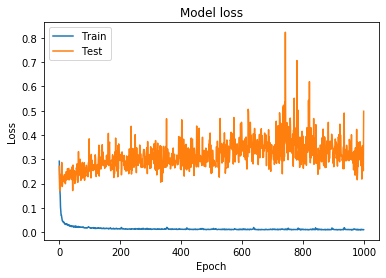

In [20]:
import matplotlib.pyplot as plt




# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [24]:
df

,val_loss,loss
0,0.271318,0.292208
1,0.181091,0.233669
2,0.170120,0.173623
3,0.237940,0.150316
4,0.215207,0.103878
5,0.235417,0.083101
6,0.235007,0.069757
7,0.192635,0.069413
8,0.287003,0.062364
9,0.187805,0.053428


In [27]:
import numpy as np
np.argmin(df["loss"])

963

In [28]:
df[['loss']].idxmin() 

loss    963
dtype: int64

In [29]:
df[df['loss']==df['loss'][963]]

,val_loss,loss
963,0.318928,0.009587


In [1]:
import pandas as pd
df=pd.read_csv("Best_model_Two/history.csv")

In [2]:
df.head()

,Unnamed: 0,val_loss,loss
0,0,0.271318,0.292208
1,1,0.181091,0.233669
2,2,0.170120,0.173623
3,3,0.237940,0.150316
4,4,0.215207,0.103878


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Unnamed: 0    1000 non-null int64
val_loss      1000 non-null float64
loss          1000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 23.5 KB


In [4]:
df["loss"].mean()

0.01481919353181154

In [6]:
df.describe()

,Unnamed: 0,val_loss,loss
count,1000.000000,1000.000000,1000.000000
mean,499.500000,0.316213,0.014819
std,288.819436,0.060234,0.014598
min,0.000000,0.170120,0.009587
25%,249.750000,0.277187,0.011270
50%,499.500000,0.311064,0.012215
75%,749.250000,0.346074,0.014137
max,999.000000,0.822659,0.292208
